
# Bike Assignment

### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

**So interpretation is important!**

In [154]:
# Importing Necessary Libraries and Functions

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import Numpy and Pandas Library

import numpy as np
import pandas as pd

#Import Matplotlib and Seaborn Libraries for Data Visulaization

import matplotlib.pyplot as plt
import seaborn as sns

#Using Pandas Inbuilt function to visualize all columns and rows present in Dataset

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Using sklearn library and importing train_test_split function to create Training & Test Datasets

from sklearn.model_selection import train_test_split

# Using sklearn library and importing MinMaxScaler function for feature scaling

from sklearn.preprocessing import MinMaxScaler

# Using sklearn library and importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Importing statsmodel library

import statsmodels.api as sm

#Using statsmodel library and importing variance_inflation_factor function

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Using statsmodel library and importing R-square function

from sklearn.metrics import r2_score

## Step 1: Reading and carrying out Data Inspection

Let us first read the housing dataset and do basic data inspection i.e. is checking null values,duplicates etc.

In [155]:
#reading the dataset
bike = pd.read_csv("day.csv")

In [156]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the various aspects of the housing dataframe

In [157]:
bike.shape

(730, 16)

In [158]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [159]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [160]:
#Checking Duplicates
bike.shape,bike.drop_duplicates().shape

((730, 16), (730, 16))

### Insights on Data Inspection:-

- Bike Dataset have 730 rows and 16 columns in it
- Their are no null values in the given dataset.
- Their are no duplicates found in given dataset.

## Step 2: Dropping Unnecessary Columns

- We will drop column Instant since it is just a row identifier and does not have any role in model building.
- We will drop column 'dteday' since it is just a row identifier and does not have any role in model building.
- We will drop columns 'count' & 'registered' since it is alredy included in target variable 'cnt'

In [161]:
bike.drop(['instant','dteday','casual','registered'],axis = 1, inplace = True)

In [162]:
#Checking the dataset again
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Value Mapping

- We can see that our dataset has many categorical columns with values as 1,2,3,4 etc.

- But in order to fit a regression line, we would need to create dummy variables and for that these variables need to be converted to string

In [163]:
#mapping values of season from data dictionary
bike[['season']] = bike[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))

In [164]:
#mapping values of mnth from data dictionary
bike[['mnth']] = bike[['mnth']].apply(lambda x : x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug'
                                                        ,9:'sep',10:'oct',11:'nov',12:'dec'}))

In [165]:
#mapping values of weekday from data dictionary
bike[['weekday']] = bike[['weekday']].apply(lambda x : x.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'}))

In [166]:
#mapping values of weathersit from data dictionary
bike[['weathersit']] = bike[['weathersit']].apply(lambda x : x.map({1:'clear',2:'mist & cloudy',3:'light snow & rain'
                                                                    ,4:'heavy rain & ice pallets',}))

In [167]:
##Checking the dataset again
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 4: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a scatterplot of all the numeric variables w.r.t to Target Variable

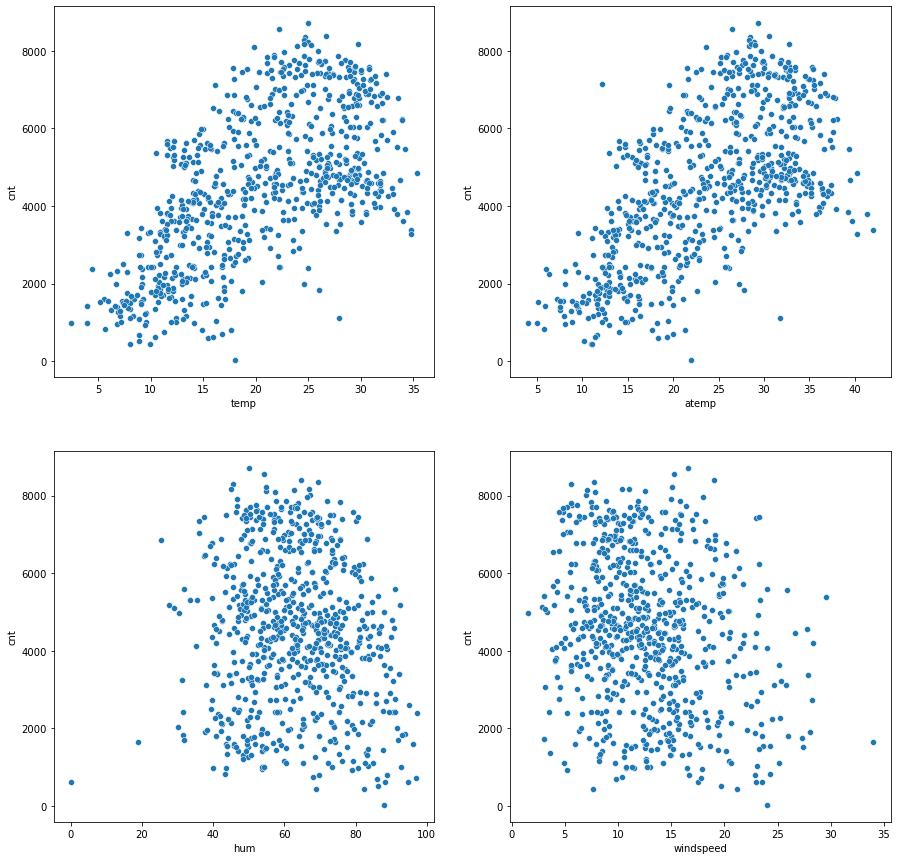

In [168]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.scatterplot(x = 'atemp', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.scatterplot(x = 'hum', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = bike)
plt.show()

### Insights on Target Variable vs Numeric Variables:-

- Target Variable Cnt is postively correlated with temp variable.
- Target Variable Cnt is postively correlated with atemp variable.
- Target Variable Cnt is negatively correlated with windspeed variable.

#### Visualising Categorical Variables

As we might have noticed, there are a few categorical variables as well. Let's make a boxplot of these variables w.r.t to Target Variable

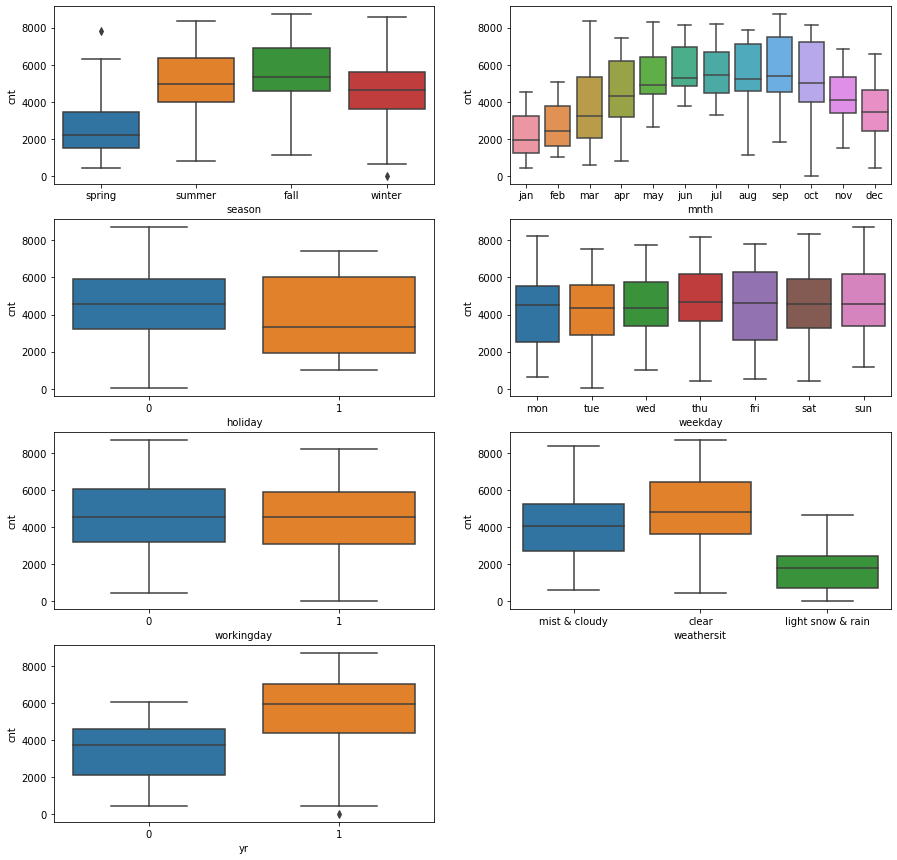

In [169]:
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

### Insights on Target Variable vs Categorical Variables:-

- There is significant drop in target variable in spring season.
- Majority of bikes are rented in fall season.
- There is increasing trend in bikes rented in the month of January to September with dip in month of November & December.
- Majority of bikes are rented in the month of June to September.
- Majority of bikes are rented when there is no holiday.
- There is pretty slight variation in bikes getting rented among days.
- Bikes are rented more when there is clear weather with few clouds or partly cloudy.
- Bikes are rented when there are light snow and rain with scattered clouds.
- Bikes are not rented when there is heavy rain accompanied by thunderstorms and falling of ice pallets.
- Bikes are rented more in year 2019 compared to 2018

#### Visualising Correlation among Variables

Checking Correlation among variables to discover multicollinearity

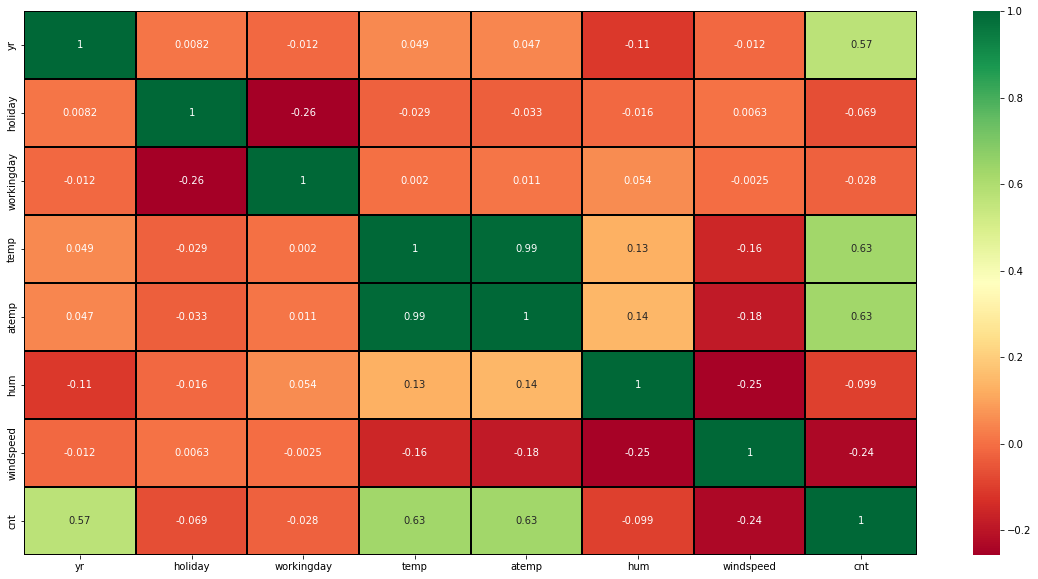

In [170]:
# Let's check the Correlation
plt.figure(figsize = (20,10))
sns.heatmap(bike.corr(), cmap='RdYlGn',annot=True,linewidths=2,linecolor='black')
plt.show()

### Insights on Correlation:-

- Target Variable is highly positively correlated with predictor variable 'temp' , 'atemp' and 'yr' 
- Target Variable is negatively correlated with predictor variable 'windspeed'
- Predictor Variable 'temp' and 'atemp' are highly correlated with each other which shows the case of multicollinearity.

In [171]:
#Since we observed that temp and atemp are highly correlated which is not desirable hence dropping variable atemp.
bike.drop(['atemp'],axis = 1, inplace = True)

## Step 5: Data Preparation

### Dummy Variables

The variables `season` , `mnth` , `weekday` , `weathersit` has multiple levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [172]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
season_dummy = pd.get_dummies(bike['season'])

In [173]:
# Check what the dataset 'season_dummy' looks like
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need three columns. We can drop the `fall` column, as the type of season can be identified with just the last three columns where — 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [174]:
# Let's drop the first column from season_dummy df using 'drop_first = True'
season_dummy = pd.get_dummies(bike['season'], drop_first = True)

In [175]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummy' and dropping 1st column.
mnth_dummy = pd.get_dummies(bike['mnth'], drop_first = True)

In [176]:
# Check what the dataset 'mnth_dummy' looks like
mnth_dummy.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [177]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummy' and dropping 1st column.
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True)

In [178]:
# Check what the dataset 'weekday_dummy' looks like
weekday_dummy.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [179]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummy' and dropping 1st column.
weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first = True)

In [180]:
# Check what the dataset 'weathersit_dummy' looks like
weathersit_dummy.head()

,light snow & rain,mist & cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [181]:
# Add the dummy variables datasets to the original bike dataframe
bike = pd.concat([bike, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy ], axis = 1)

In [182]:
# Now let's see the head of our dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
0,spring,0,jan,0,mon,1,mist & cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,mist & cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [183]:
# Drop 'season' , 'mnth' , 'weekday' , 'weathersit' as we have created the dummies for it
bike.drop(['season' , 'mnth' , 'weekday' , 'weathersit'], axis = 1, inplace = True)

In [184]:
# Checking the head of dataset again
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 6: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [185]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# We have considered 80 20 ratio of Train vs Test
bike_train, bike_test = train_test_split(bike, train_size = 0.8, test_size = 0.2, random_state = 100)

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [186]:
scaler = MinMaxScaler()

In [187]:
# Apply scaler() to all the numeric columns except the 'binary' and 'dummy' variables
bike_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_train[bike_vars] = scaler.fit_transform(bike_train[bike_vars])

In [188]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
367,1,0,1,0.113228,0.454701,0.695175,0.254717,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0.868385,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,0.217556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
705,1,0,0,0.326094,0.787463,0.189819,0.573631,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
379,1,0,1,0.133996,0.431945,0.449210,0.263346,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [189]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.027397,0.342466
std,0.500241,0.163378,0.446377,0.225336,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [190]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Step 7: Building a linear model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [191]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [192]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 13),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 9),
 ('light snow & rain', True, 1),
 ('mist & cloudy', True, 1)]

In [193]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'light snow & rain',
       'mist & cloudy'],
      dtype='object')

In [194]:
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model 1

In [195]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [196]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [197]:
# Build a 1st fitted model
lr_1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [198]:
#Let's see the summary of our linear model
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          9.71e-222
Time:                        16:15:34   Log-Likelihood:                 594.34
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     568   BIC:                            -1087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3181      0.034      9.333      0.000       0.251       0.385
yr                    0.2276      0.007     30.460      0.000       0.213       0.242
holiday              -0.0933      0.023     -4.089      0.000      -0.138      -0.048
temp                  0.4843      0.034     14.101      0.000       0.417       0.552
hum                  -0.1569      0.036     -4.399      0.000      -0.227      -0.087
windspeed            -0.1822      0.024     -7.606      0.000      -0.229      -0.135
spring               -0.0706      0.020     -3.598      0.000      -0.109      -0.032
summer                0.0404      0.014      2.868      0.004       0.013       0.068
winter                0.1092      0.016      6.761      0.000       0.077       0.141
dec                  -0.0453      0.016     -2.879      0.004      -0.076      -0.014
jan                  -0.0414      0.017     -2.489      0.013      -0.074      -0.009
jul                  -0.0549      0.017     -3.212      0.001      -0.088      -0.021
nov                  -0.0546      0.018     -3.119      0.002      -0.089      -0.020
sep                   0.0663      0.016      4.266      0.000       0.036       0.097
light snow & rain    -0.2510      0.025     -9.970      0.000      -0.300      -0.202
mist & cloudy        -0.0546      0.010     -5.585      0.000      -0.074      -0.035
==============================================================================
Omnibus:                       87.012   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.812
Skew:                          -0.764   Prob(JB):                     6.82e-49
Kurtosis:                       5.604   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [199]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.19
2,temp,18.15
4,windspeed,4.70
5,spring,4.43
7,winter,3.80
6,summer,2.81
14,mist & cloudy,2.34
0,yr,2.11
11,nov,1.74
9,jan,1.71


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `jan` as it has a very high p-value  of `0.013`. Let's go ahead and drop this variable.

In [200]:
# Dropping varaible with very high p-value

X_train_rfe = X_train_rfe.drop('jan', 1,)

### Model 2

In [201]:
# Build a 2nd fitted model
X_train_lm = sm.add_constant(X_train_rfe)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [202]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     225.8
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.37e-221
Time:                        16:15:35   Log-Likelihood:                 591.17
No. Observations:                 584   AIC:                            -1152.
Df Residuals:                     569   BIC:                            -1087.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2996      0.033      8.967      0.000       0.234       0.365
yr                    0.2265      0.007     30.231      0.000       0.212       0.241
holiday              -0.0957      0.023     -4.180      0.000      -0.141      -0.051
temp                  0.5125      0.033     15.732      0.000       0.449       0.576
hum                  -0.1643      0.036     -4.602      0.000      -0.234      -0.094
windspeed            -0.1777      0.024     -7.408      0.000      -0.225      -0.131
spring               -0.0731      0.020     -3.711      0.000      -0.112      -0.034
summer                0.0455      0.014      3.249      0.001       0.018       0.073
winter                0.1141      0.016      7.091      0.000       0.083       0.146
dec                  -0.0346      0.015     -2.273      0.023      -0.064      -0.005
jul                  -0.0569      0.017     -3.319      0.001      -0.091      -0.023
nov                  -0.0485      0.017     -2.784      0.006      -0.083      -0.014
sep                   0.0683      0.016      4.378      0.000       0.038       0.099
light snow & rain    -0.2459      0.025     -9.756      0.000      -0.295      -0.196
mist & cloudy        -0.0538      0.010     -5.487      0.000      -0.073      -0.035
==============================================================================
Omnibus:                       81.929   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.828
Skew:                          -0.728   Prob(JB):                     3.33e-45
Kurtosis:                       5.510   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.55
2,temp,16.98
4,windspeed,4.69
5,spring,4.17
7,winter,3.80
6,summer,2.80
13,mist & cloudy,2.32
0,yr,2.09
10,nov,1.72
9,jul,1.60


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `dec` as it has a very high p-value  of `0.023`. Let's go ahead and drop this variable.

In [204]:
# Dropping varaible with very high p-value

X_train_rfe = X_train_rfe.drop('dec', 1,)

### Model 3

In [205]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_rfe)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [206]:
# Print the summary of the model
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     241.0
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.12e-221
Time:                        16:15:35   Log-Likelihood:                 588.53
No. Observations:                 584   AIC:                            -1149.
Df Residuals:                     570   BIC:                            -1088.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2868      0.033      8.677      0.000       0.222       0.352
yr                    0.2260      0.008     30.061      0.000       0.211       0.241
holiday              -0.0980      0.023     -4.268      0.000      -0.143      -0.053
temp                  0.5329      0.031     16.950      0.000       0.471       0.595
hum                  -0.1722      0.036     -4.828      0.000      -0.242      -0.102
windspeed            -0.1759      0.024     -7.308      0.000      -0.223      -0.129
spring               -0.0667      0.020     -3.411      0.001      -0.105      -0.028
summer                0.0503      0.014      3.614      0.000       0.023       0.078
winter                0.1095      0.016      6.835      0.000       0.078       0.141
jul                  -0.0572      0.017     -3.324      0.001      -0.091      -0.023
nov                  -0.0347      0.016     -2.116      0.035      -0.067      -0.002
sep                   0.0729      0.016      4.699      0.000       0.042       0.103
light snow & rain    -0.2427      0.025     -9.608      0.000      -0.292      -0.193
mist & cloudy        -0.0522      0.010     -5.316      0.000      -0.072      -0.033
==============================================================================
Omnibus:                       76.031   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.164
Skew:                          -0.697   Prob(JB):                     1.24e-39
Kurtosis:                       5.328   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.04
2,temp,16.16
4,windspeed,4.69
5,spring,4.16
7,winter,3.60
6,summer,2.78
12,mist & cloudy,2.29
0,yr,2.09
8,jul,1.60
9,nov,1.54


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `nov` as it has a very high p-value  of `0.035`. Let's go ahead and drop this variable.

In [208]:
# Dropping varaible with high p-value

X_train_rfe = X_train_rfe.drop('nov', 1,)

### Model 4

In [209]:
# Build a 4th fitted model
X_train_lm = sm.add_constant(X_train_rfe)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [210]:
# Print the summary of the model
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     259.2
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          6.27e-222
Time:                        16:15:35   Log-Likelihood:                 586.24
No. Observations:                 584   AIC:                            -1146.
Df Residuals:                     571   BIC:                            -1090.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2760      0.033      8.426      0.000       0.212       0.340
yr                    0.2261      0.008     29.986      0.000       0.211       0.241
holiday              -0.1033      0.023     -4.513      0.000      -0.148      -0.058
temp                  0.5442      0.031     17.515      0.000       0.483       0.605
hum                  -0.1705      0.036     -4.767      0.000      -0.241      -0.100
windspeed            -0.1782      0.024     -7.388      0.000      -0.226      -0.131
spring               -0.0595      0.019     -3.079      0.002      -0.097      -0.022
summer                0.0537      0.014      3.875      0.000       0.026       0.081
winter                0.1030      0.016      6.530      0.000       0.072       0.134
jul                  -0.0567      0.017     -3.285      0.001      -0.091      -0.023
sep                   0.0767      0.015      4.961      0.000       0.046       0.107
light snow & rain    -0.2412      0.025     -9.523      0.000      -0.291      -0.191
mist & cloudy        -0.0516      0.010     -5.243      0.000      -0.071      -0.032
==============================================================================
Omnibus:                       75.269   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.313
Skew:                          -0.695   Prob(JB):                     8.54e-39
Kurtosis:                       5.297   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.87
2,temp,16.00
4,windspeed,4.63
5,spring,4.12
7,winter,3.26
6,summer,2.77
11,mist & cloudy,2.28
0,yr,2.09
8,jul,1.60
9,sep,1.38


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a very high VIF of `27.87`. Let's go ahead and drop this variable.

In [212]:
# Dropping varaible with high VIF

X_train_rfe = X_train_rfe.drop('hum', 1,)

### Model 5

In [213]:
# Build a 5th fitted model
X_train_lm = sm.add_constant(X_train_rfe)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [214]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     270.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          2.48e-218
Time:                        16:15:35   Log-Likelihood:                 574.85
No. Observations:                 584   AIC:                            -1126.
Df Residuals:                     572   BIC:                            -1073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1874      0.027      6.819      0.000       0.133       0.241
yr                    0.2309      0.008     30.337      0.000       0.216       0.246
holiday              -0.1032      0.023     -4.424      0.000      -0.149      -0.057
temp                  0.5103      0.031     16.561      0.000       0.450       0.571
windspeed            -0.1448      0.024     -6.158      0.000      -0.191      -0.099
spring               -0.0674      0.020     -3.437      0.001      -0.106      -0.029
summer                0.0493      0.014      3.499      0.001       0.022       0.077
winter                0.0903      0.016      5.701      0.000       0.059       0.121
jul                  -0.0512      0.018     -2.919      0.004      -0.086      -0.017
sep                   0.0708      0.016      4.508      0.000       0.040       0.102
light snow & rain    -0.2892      0.024    -12.217      0.000      -0.336      -0.243
mist & cloudy        -0.0791      0.008     -9.724      0.000      -0.095      -0.063
==============================================================================
Omnibus:                       73.472   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.274
Skew:                          -0.687   Prob(JB):                     4.75e-37
Kurtosis:                       5.234   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.23
3,windspeed,4.59
5,summer,2.27
4,spring,2.14
0,yr,2.07
6,winter,1.79
7,jul,1.60
10,mist & cloudy,1.55
8,sep,1.34
9,light snow & rain,1.07


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `windspeed` as it has a high VIF  of `4.59`. Let's go ahead and drop this variable.

In [216]:
# Dropping varaible with high p-value

X_train_rfe = X_train_rfe.drop('windspeed', 1,)

### Model 6

In [217]:
# Build a 6th fitted model
X_train_lm = sm.add_constant(X_train_rfe)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [218]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     275.9
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.29e-211
Time:                        16:15:35   Log-Likelihood:                 556.11
No. Observations:                 584   AIC:                            -1090.
Df Residuals:                     573   BIC:                            -1042.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1372      0.027      5.067      0.000       0.084       0.190
yr                    0.2303      0.008     29.331      0.000       0.215       0.246
holiday              -0.1063      0.024     -4.419      0.000      -0.154      -0.059
temp                  0.5223      0.032     16.461      0.000       0.460       0.585
spring               -0.0749      0.020     -3.710      0.000      -0.115      -0.035
summer                0.0419      0.014      2.897      0.004       0.014       0.070
winter                0.0937      0.016      5.735      0.000       0.062       0.126
jul                  -0.0499      0.018     -2.755      0.006      -0.085      -0.014
sep                   0.0752      0.016      4.648      0.000       0.043       0.107
light snow & rain    -0.3048      0.024    -12.551      0.000      -0.353      -0.257
mist & cloudy        -0.0769      0.008     -9.171      0.000      -0.093      -0.060
==============================================================================
Omnibus:                       77.096   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.608
Skew:                          -0.703   Prob(JB):                     1.35e-40
Kurtosis:                       5.360   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.27
0,yr,2.07
4,summer,2.02
5,winter,1.61
6,jul,1.60
9,mist & cloudy,1.55
3,spring,1.43
7,sep,1.34
8,light snow & rain,1.06
1,holiday,1.04


Now as you can see, the p-values and VIF both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 8: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [220]:
y_train_pred = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

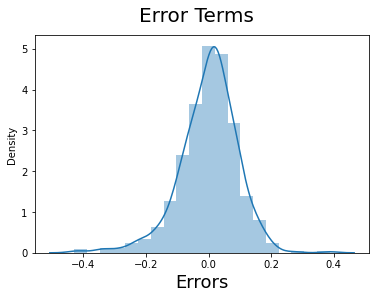

In [221]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 9: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

#### Applying the scaling on the test sets

In [222]:
# Apply scaler() to all the numeric columns except the 'binary' and 'dummy' variables
bike_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_test[bike_vars] = scaler.transform(bike_test[bike_vars])

In [223]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.547945,0.569603,0.635933,0.315127,0.517368,0.226027,0.273973,0.219178,0.061644,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,0.089041,0.095890,0.232877,0.191781,0.130137,0.082192,0.164384,0.034247,0.315068
std,0.498699,0.182488,0.499409,0.238088,0.156357,0.161524,0.212757,0.419697,0.447530,0.415114,0.241335,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,0.285783,0.295454,0.424119,0.395057,0.337612,0.275602,0.371899,0.182488,0.466142
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359075,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.730570,0.411976,0.649994,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [224]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [225]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [227]:
# Making predictions
y_test_pred = lr_6.predict(X_test_new)

## Step 10: Model Evaluation

Let's Find out the R-Square of Final Model on Train Dataset and Test Dataset respectively

In [231]:
print('The R-Square of Final Model on Train Dataset is:- ',round(r2_score(y_train,y_train_pred),4))
print('The R-Square of Final Model on Test Dataset is:-  ',round(r2_score(y_test,y_test_pred),4))

The R-Square of Final Model on Train Dataset is:-  0.828
The R-Square of Final Model on Test Dataset is:-   0.78


In [ ]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ cnt = 0.1372 + 0.2303  \times  yr - 0.1063  \times  holiday + 0.5223 \times temp - 0.0749 \times spring + 0.0419 \times summer + 0.0937 \times winter - 0.0499 \times jul + 0.0752 \times sep - 0.3048 \times light snow and rain - 0.0769 \times mist and cloudy $


## Conclusion

- As per our final Model, the top 3 predictor variables that influences the bike booking are:
    - `temp` :- A coefficient value of ‘0.5223’ indicates that a unit increase in temp variable increases the bike hire numbers by 0.5223 units.
    - `yr`:- A coefficient value of ‘0.2303’ indicates that a unit increase in yr variable increases the bike hire numbers by 0.2303 units.
    - `light snow and rain(weathersit-3)`:- A coefficient value of ‘-0.3048’ indicates that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3048 units.

- So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking